# **Load Libraries**

In [ ]:
# Import important libraries
import os
import warnings
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    VotingRegressor,
    StackingRegressor
)

import kagglehub


#**Load the Database**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)


# Construct the file path using os.path.join
file_path = os.path.join(path, 'Life Expectancy Data.csv')

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Display the first few rows of the dataset
df.head()

100%|██████████| 119k/119k [00:00<00:00, 564kB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#**Summarize Data**

In [ ]:
#Check the information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Interpretation**

The output shows information about a Pandas DataFrame named `df`.  It has 2938 rows and 22 columns.  The summary indicates the data type of each column (e.g., `object` for strings, `int64` for integers, `float64` for floating-point numbers).  Importantly, it reveals missing values (nulls) in several columns,  marked by `Non-Null Count` being less than 2938. For example, 'Life expectancy' has 10 missing values (2928 non-null out of 2938). This suggests data cleaning and imputation (filling in missing values) will be needed before modeling.


In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Interpretation:**

* Missing Data:  A significant amount of missing data is present in several columns, which needs to be addressed through imputation or removal before analysis or model training.

* Data Distribution: The standard deviations reveal considerable variability in many crucial indicators like GDP, infant mortality, and healthcare expenditure.  Histograms and box plots could visualize these distributions more effectively.

* Potential Outliers:  Extremely high maximum values in some variables, such as 'Measles' and 'under-five deaths', suggest the presence of outliers that could disproportionately influence statistical results.  Further investigation into these outliers (e.g., data errors or genuinely extreme values) is needed.


In [ ]:
df.shape

(2938, 22)

In [ ]:
# Print the column names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
Categorical columns: ['Country', 'Status']


# **Data visualizations**

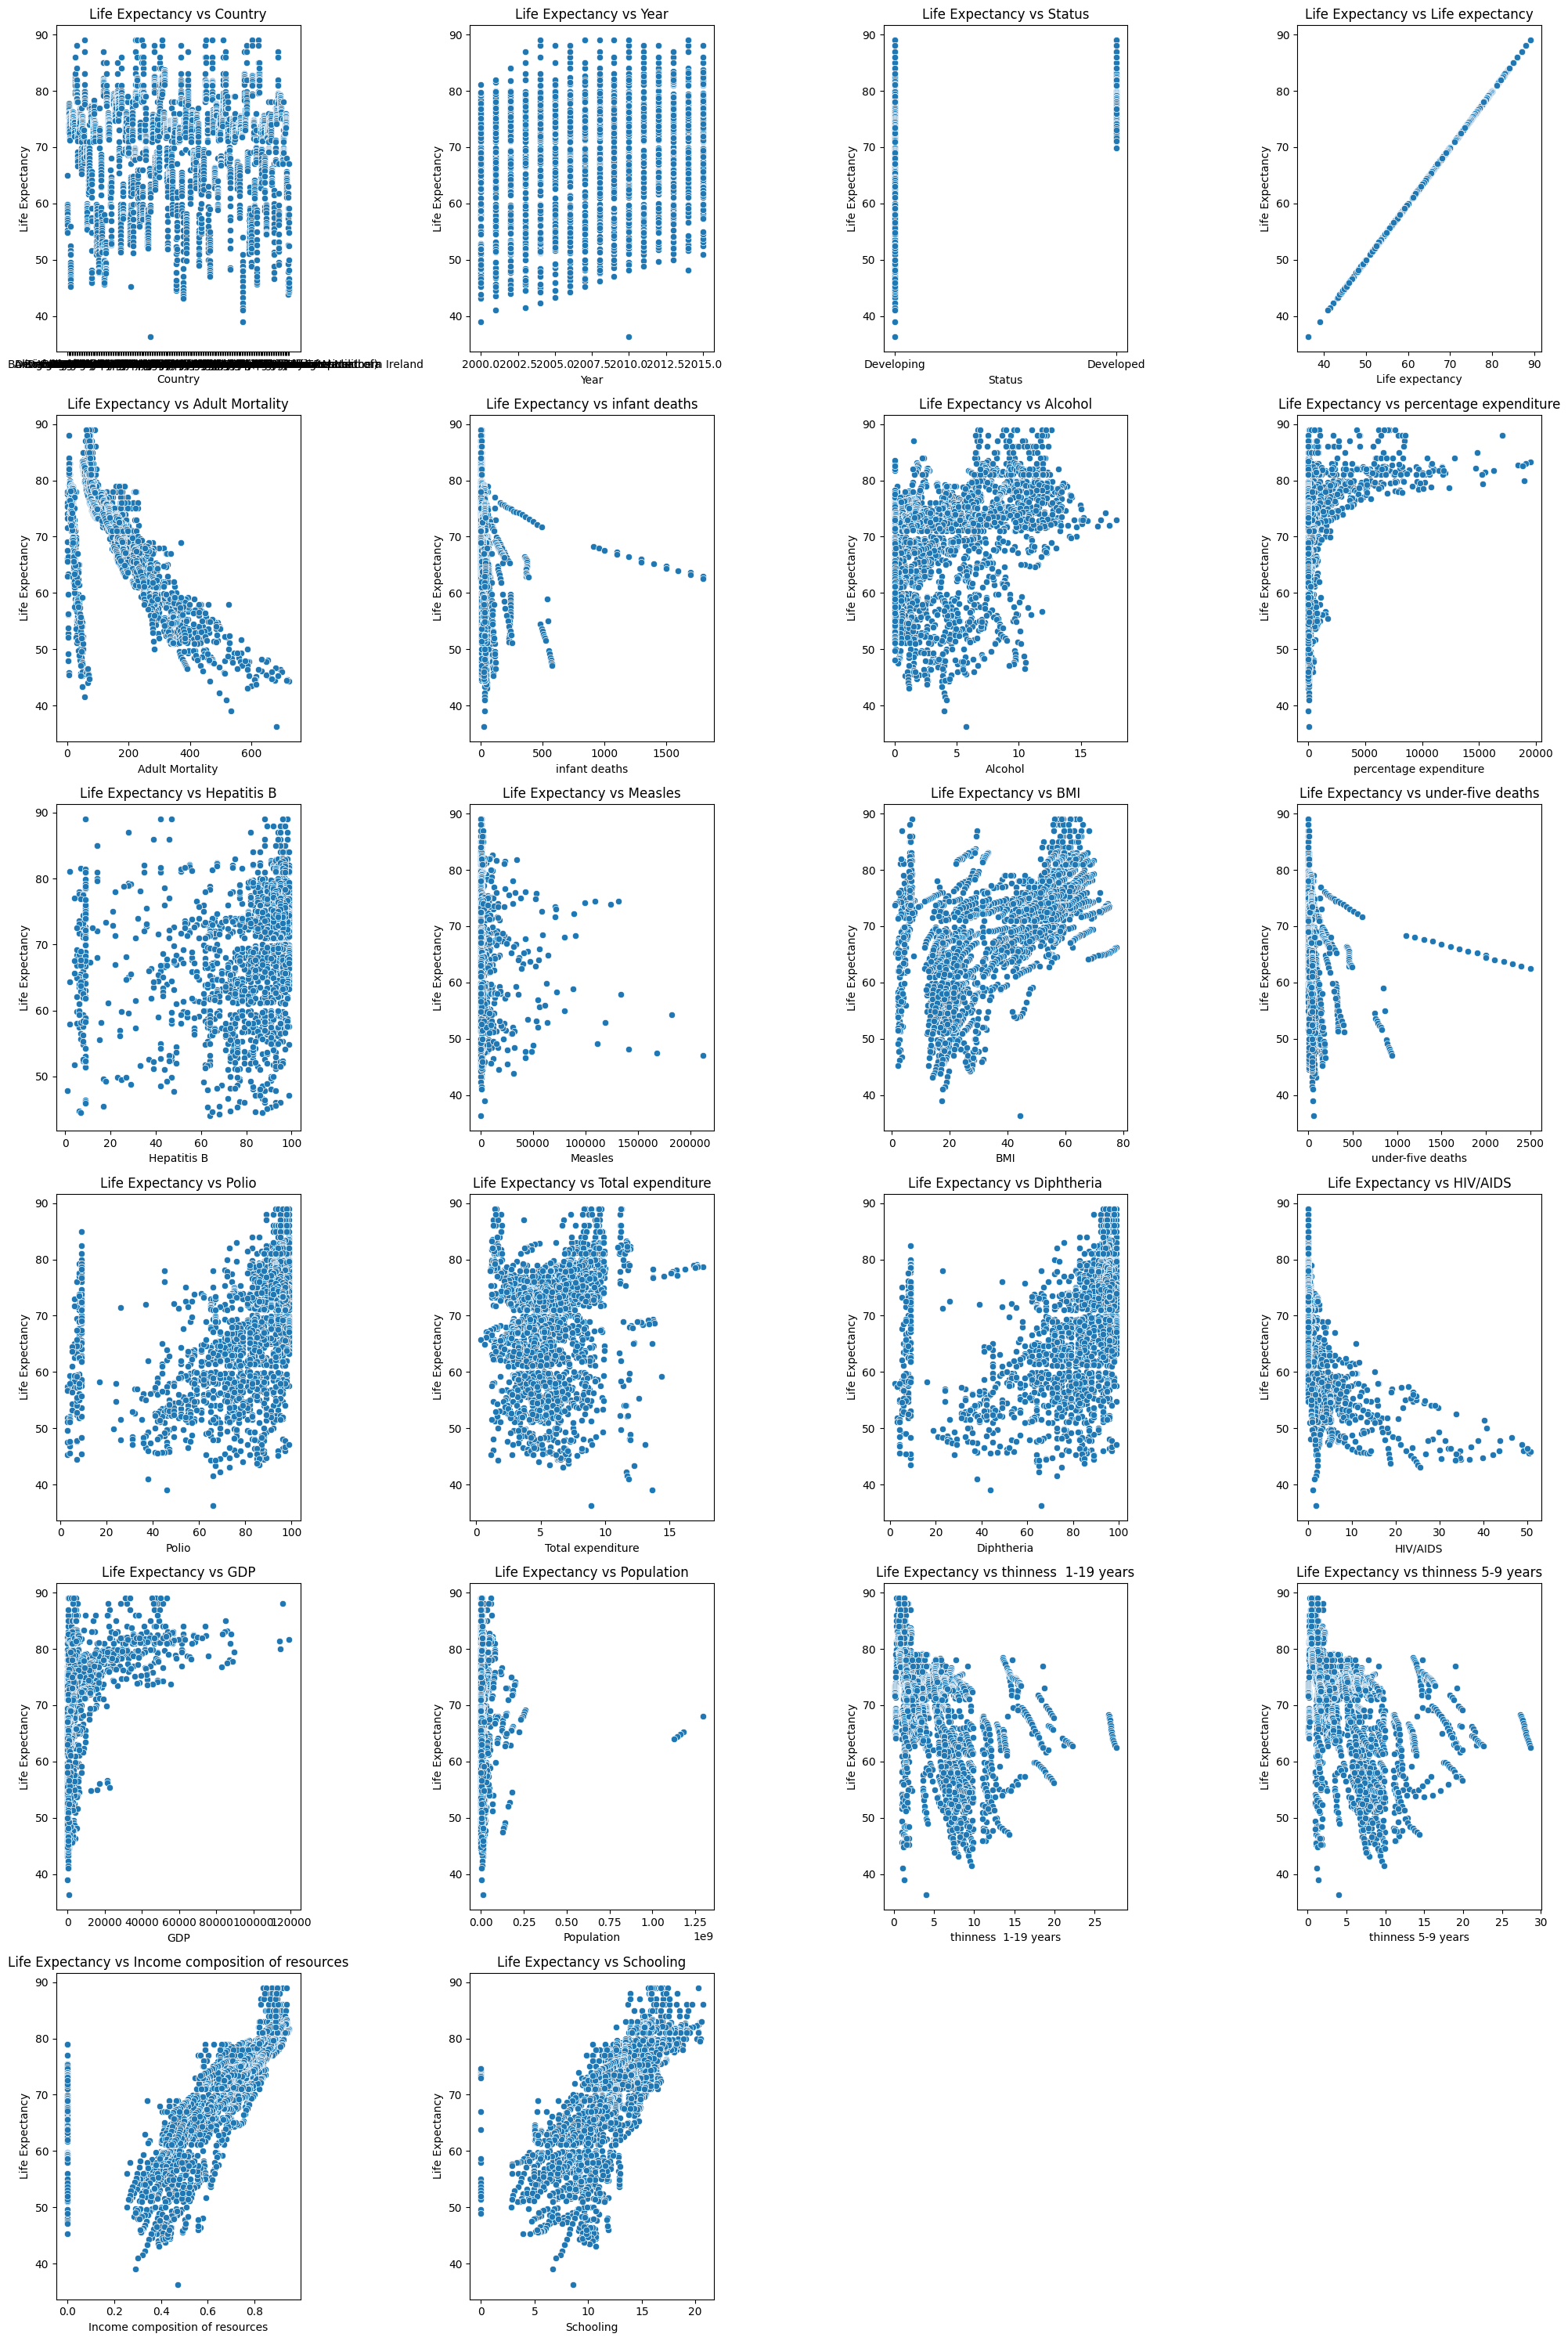

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot against Life Expectancy
# Exclude 'Country' and 'Year' from the list
columns_to_plot = df.columns

# Calculate the number of rows and columns for subplots
num_cols = 4
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Calculate rows needed

# Create plots
plt.figure(figsize=(20, 30))
for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)  # Use calculated num_rows
    # Use 'Life expectancy ' instead of 'Life expectancy'
    sns.scatterplot(x=df[col], y=df['Life expectancy'], data=df)
    plt.title(f'Life Expectancy vs {col}')
    plt.xlabel(col)
    plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

Based on the above plots the most impactful columns are: a. Status: if the country is developed, the life expectancy is from 70 and above. Whereas, on the developing countries the lowest life expectancy can go lower than 40.This means the status of a country has huge effect on the life expectancy of its individuals.

b. Adult Mortality: As the number of adult mortality increases, the life expectancy has declined extensively as shown on the scatter plot. This means, adult mortality holds a huge weight on the life expectancy of a country.

c. Measles: When the number of measles were close to 0, the life expectancy came close to 90, but as the number of measles increases, the life expectancy highest hit was no more than 50 to 60 years.

d. Schooling and Income composition of resources: These two factors affect the life expectancy of a country significantly, as the scatter plot shows the life expectancy increases along with the schooling and income composition of resources.

e. GDP:when the Gross domestic product (GDP) increases, the life expectncy of the country increases.

f. thinness 1- 19 years: as the thinness increases, the probablity of an individual living longer decreases which is clearly seen on the plot.

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

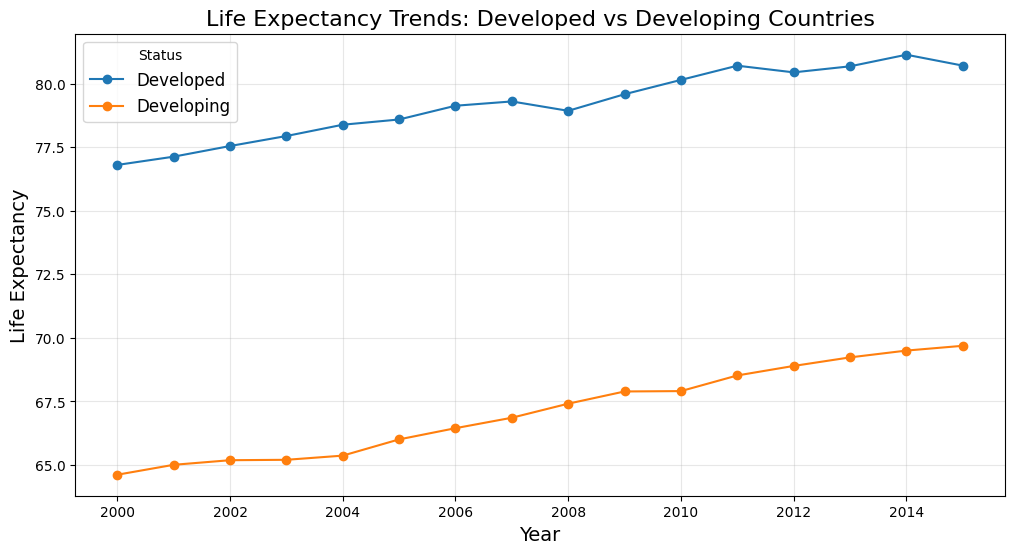

In [ ]:
data1 = df[['Year', 'Status', 'Life expectancy']]

# Handle missing values
data1 = data1.dropna(subset=['Life expectancy'])

# Group by Year and Status to calculate the mean life expectancy
status_avg = data1.groupby(['Year', 'Status'])['Life expectancy'].mean().unstack()

# Plot life expectancy by Status
plt.figure(figsize=(12, 6))
status_avg.plot(ax=plt.gca(), marker='o')
plt.title('Life Expectancy Trends: Developed vs Developing Countries', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(title='Status', fontsize=12)
plt.show()

**Interpretation**:The bar plot comparing life expectancy across developed and developing countries helped us visualize the stark differences in life expectancy based on the economic and healthcare status of a country. Developed countries showed consistently higher life expectancy values, generally above 70 years, while developing countries exhibited a broader range of life expectancy values. Some countries in this category had life expectancy values dropping below 40 years, emphasizing how the development status of a country influences life expectancy outcomes.

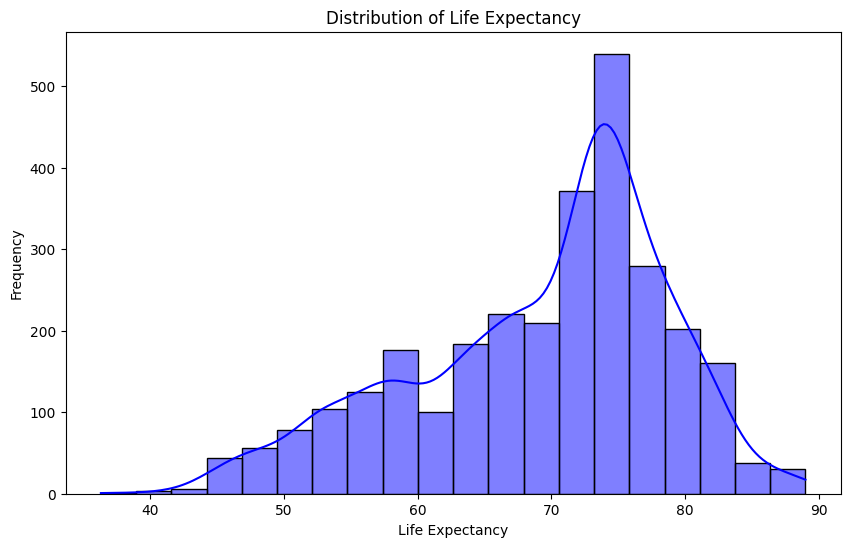

In [ ]:
# Check the distribution of the target variable 'Life expectancy '

plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy'], bins=20, kde=True, color='blue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

**Interpretation**:The distribution of life expectancy in years shows that years between 70 and 80 years are the most frequent

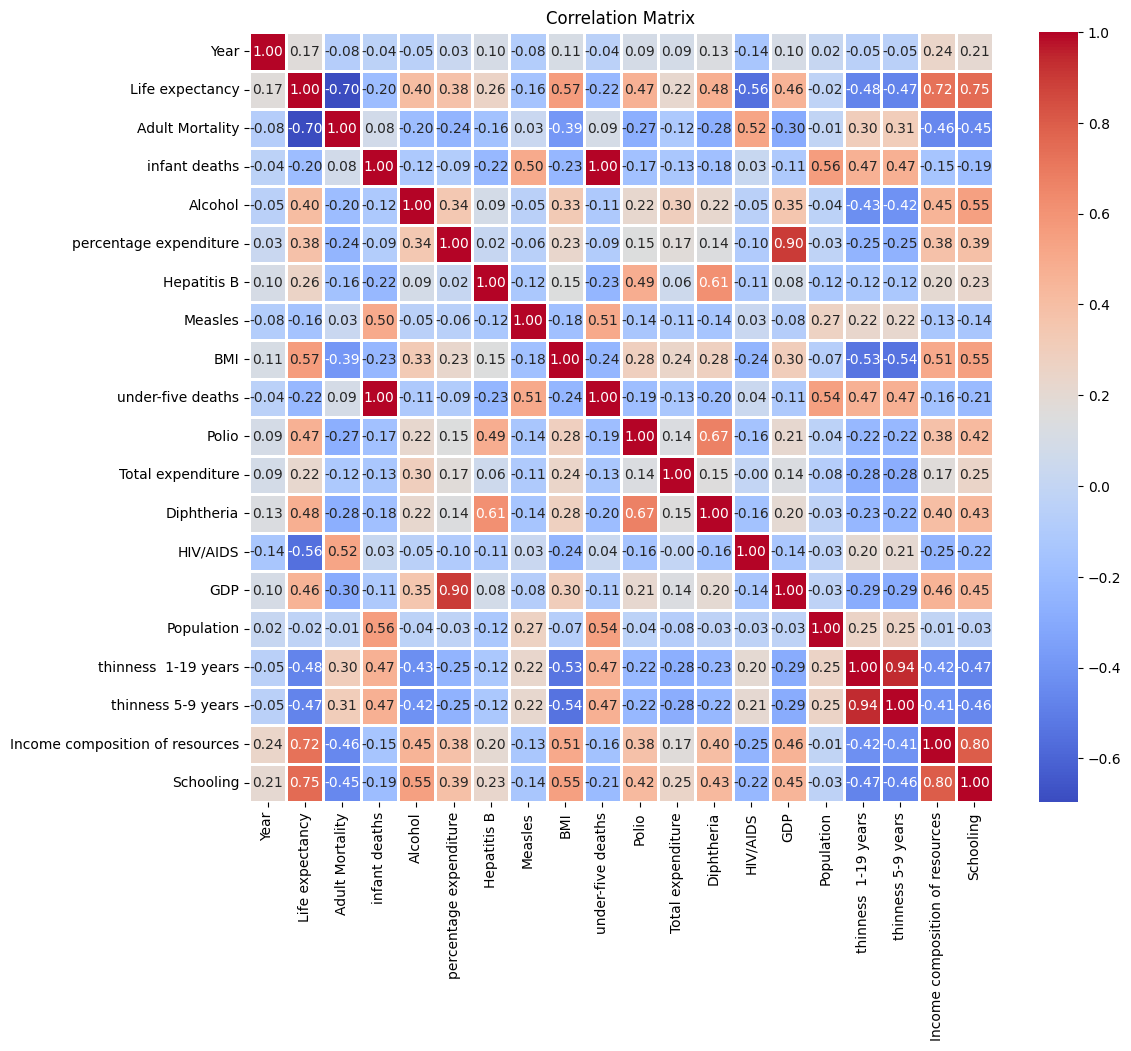

In [ ]:
# Explore correlations between numerical features and the target variable
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths= 2 , linecolor = 'white', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Interpretation:** Life expectancy exhibits a strong negative correlation of -0.7 with adult mortality and a strong positive correlation of 0.7 with both income composition of resources and schooling.

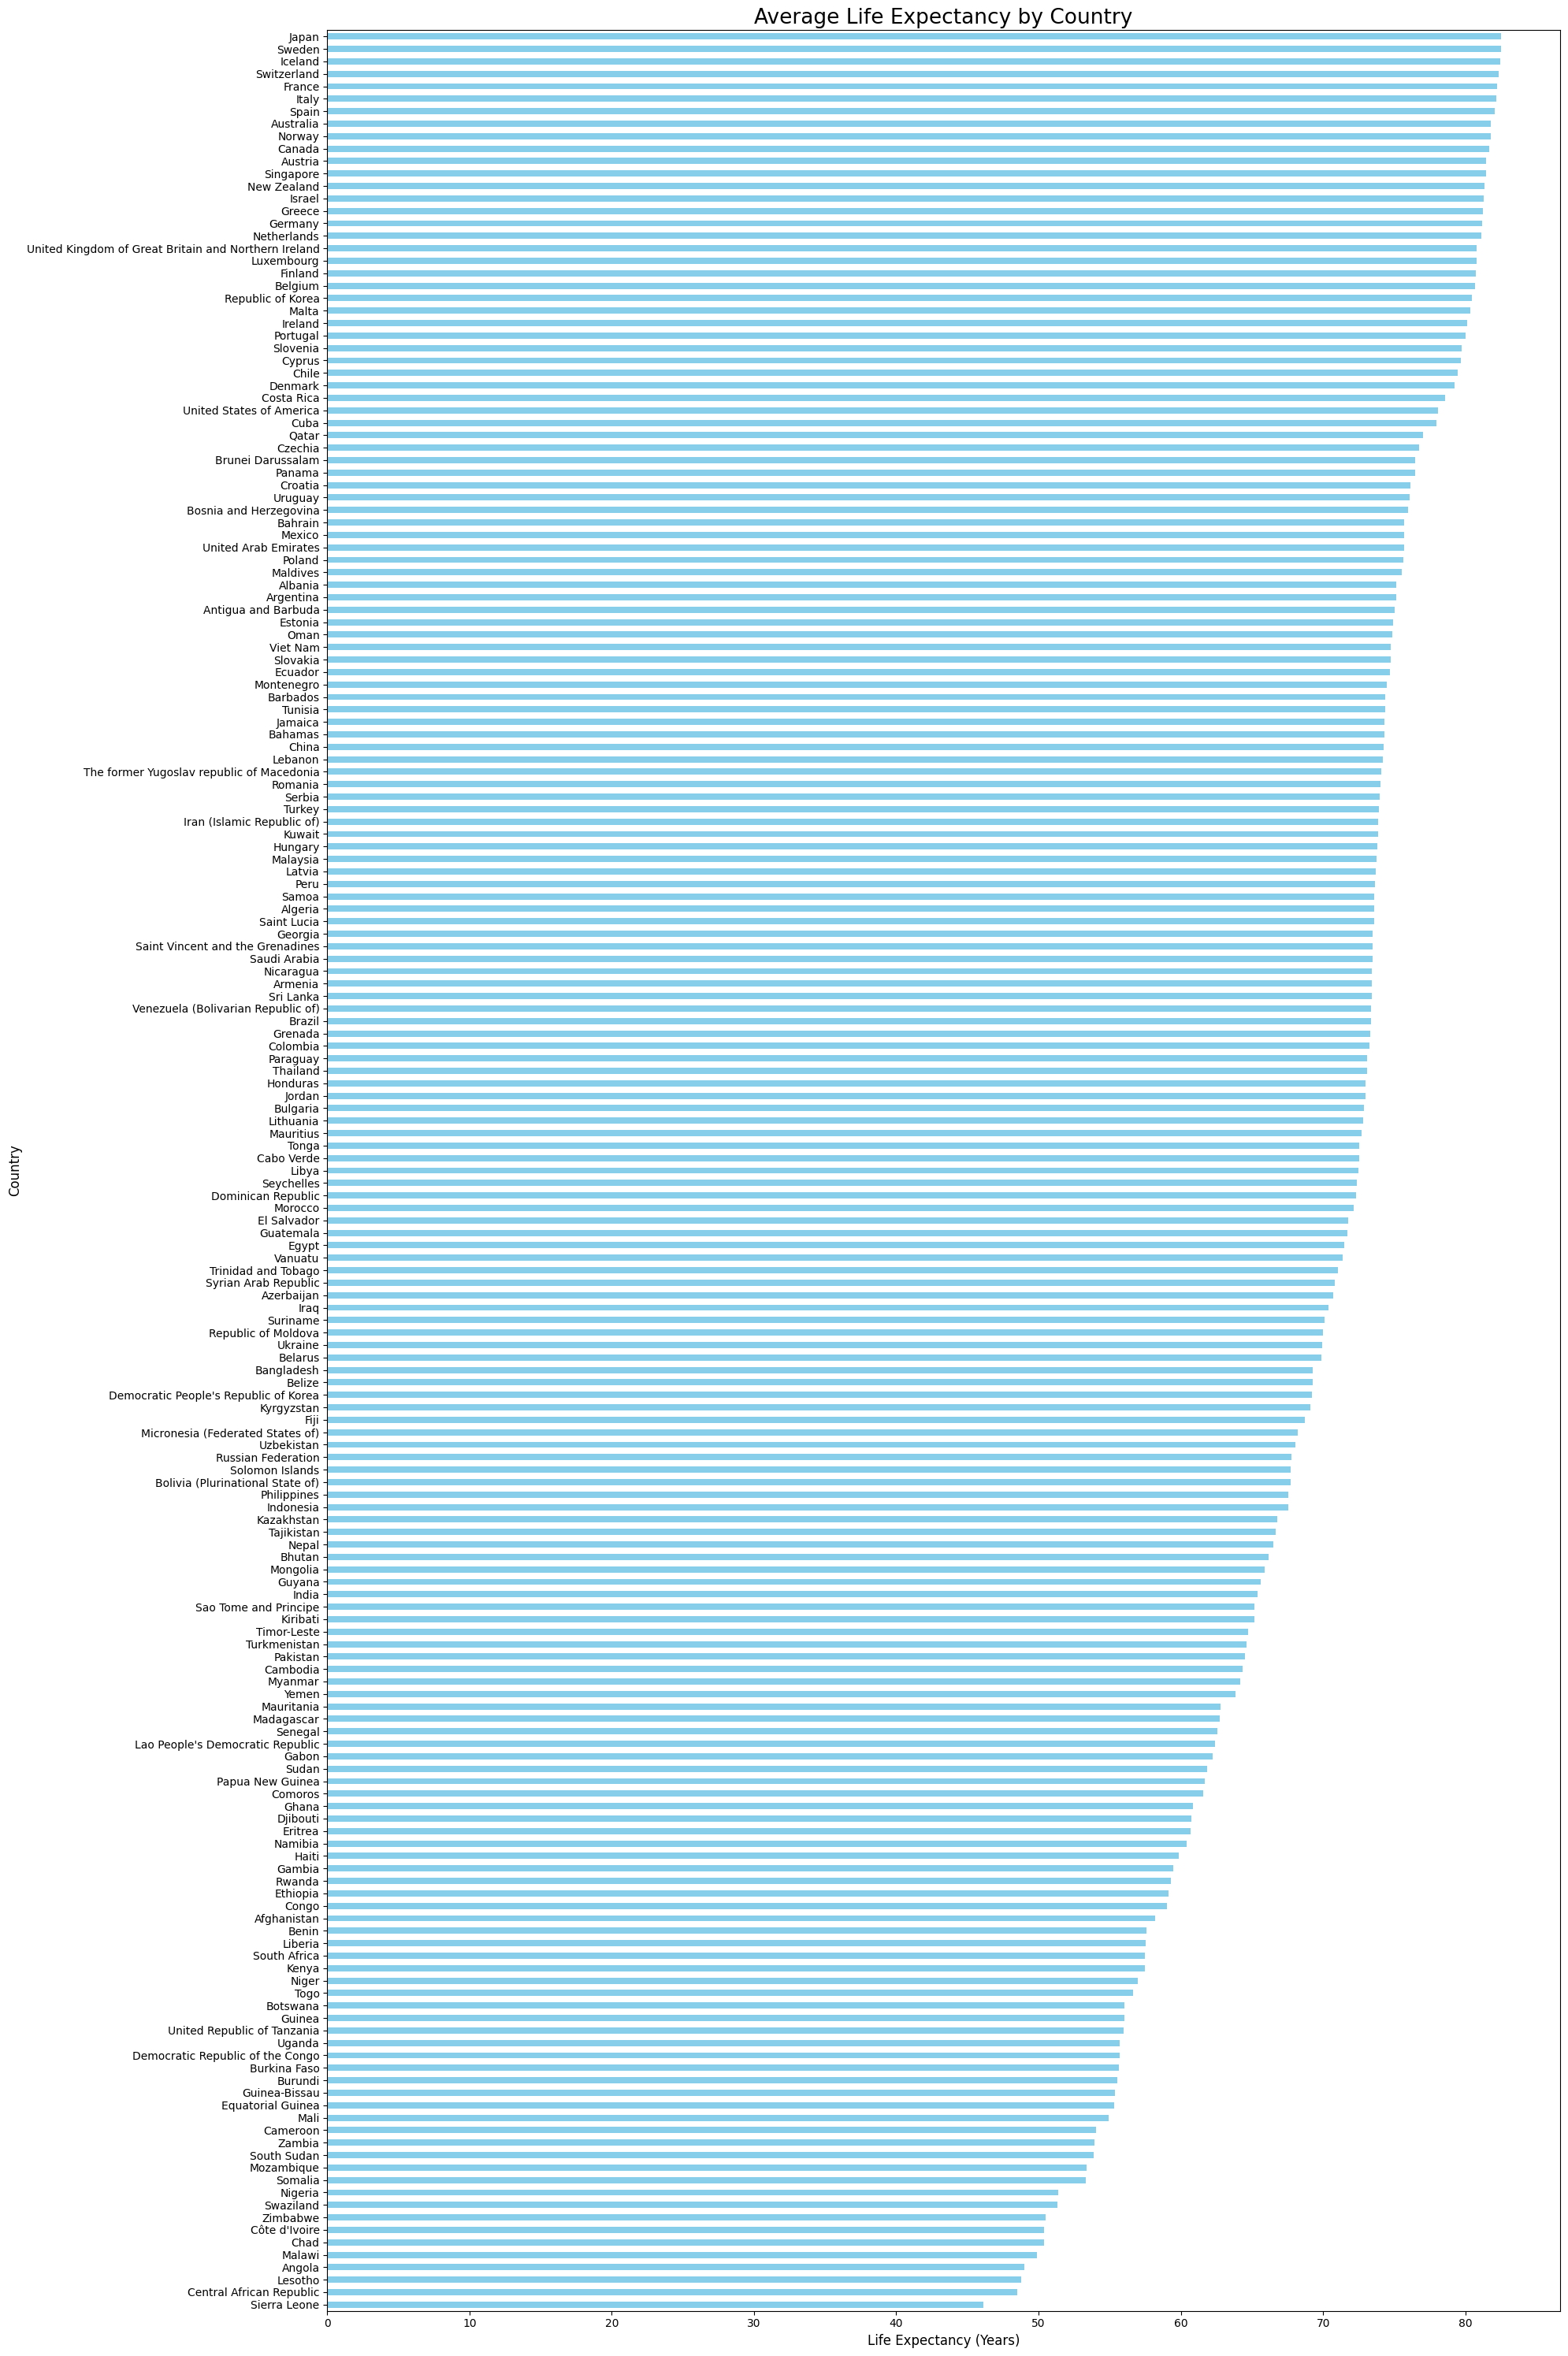

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Drop rows where Life expectancy is missing
df1 = df.dropna(subset=['Life expectancy'])

# Calculate average life expectancy by country
avg_life_expectancy = df1.groupby('Country')['Life expectancy'].mean().sort_values()

# Plot the barplot
plt.figure(figsize=(20, 30))  # Adjust the size to make it more readable
avg_life_expectancy.plot(kind='barh', color='skyblue')

# Add titles and labels
plt.title('Average Life Expectancy by Country', fontsize=19)
plt.xlabel('Life Expectancy (Years)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

To further explore geographical patterns, we used a bar plot to display the top 10 countries with the highest life expectancy. The plot highlighted that European countries, such as Switzerland and Sweden, ranked at the top, while many African countries had much lower life expectancy values. This visualization emphasized the regional disparities in life expectancy, with wealthier, well-developed European countries benefiting from better healthcare systems and living conditions, contributing to their higher life expectancy. Lastly, the distribution plot of life expectancy provided a clearer picture of how life expectancy is distributed across countries. The plot revealed a near-normal distribution, with a peak around 75 years, suggesting that this is the most common life expectancy globally. However, the plot also showed outliers on both ends, where some countries had exceptionally high or low life expectancy. This distribution emphasized the global disparities in life expectancy, highlighting both the successes of countries with strong healthcare systems and the challenges faced by those with lower resources and higher disease burdens.

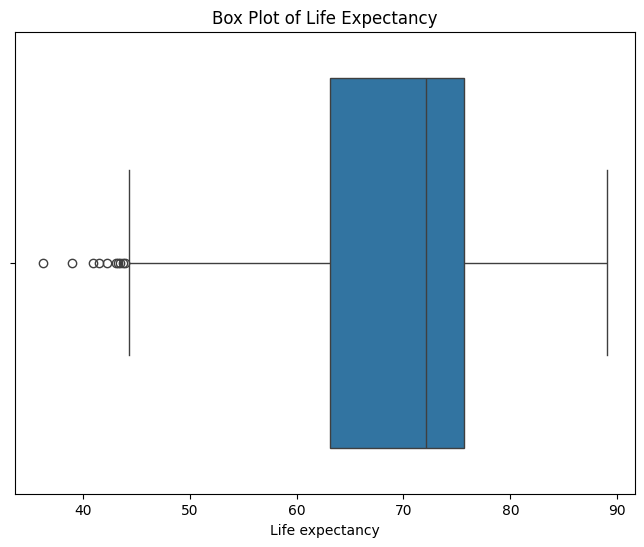

In [ ]:
# box plot of 'Life expectancy'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Life expectancy', data=df)
plt.title('Box Plot of Life Expectancy')
plt.show()

#**Data Cleaning and Transforms**

In [ ]:
#Check for null values in the dataset
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
# prompt: intepretae this saying there are a lot of missing values in one line, make it consice
# Check for null values in the dataset
# print(df.isnull().sum())
# Country                              0
# Year                                 0
# Status                               0
# Life expectancy                     10
# Adult Mortality                     10
# infant deaths                        0
# Alcohol                            194
# percentage expenditure               0
# Hepatitis B                        553
# Measles                              0
# BMI                                 34
# under-five deaths                    0
# Polio                               19
# Total expenditure                  226
# Diphtheria                          19
# HIV/AIDS                             0
# GDP                                448
# Population                         652
# thinness  1-19 years                34
# thinness 5-9 years                  34
# Income composition of resources    167
# Schooling                          163
# dtype: int64

#Many columns have missing values.  See detailed breakdown below:
print(df.isnull().sum())

The code analyzes a life expectancy dataset, identifying missing values, exploring correlations between features and life expectancy, and visualizing trends.  Key findings include the significant impact of country status, adult mortality, measles, schooling, income, and GDP on life expectancy.  Data cleaning steps are outlined, including handling missing values, which are substantial in several columns.  The code also visualizes the distribution of life expectancy and explores relationships between variables through scatter plots, correlation matrices, and bar plots.


In [ ]:
df_cleaned = df.copy()
#Excluding of the columns that do not help in the prediction (building a model)
df_cleaned.drop(columns=['thinness 5-9 years', 'Total expenditure', 'infant deaths', 'Country', 'Year'], inplace=True)


In [ ]:
# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned

,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Developing,44.3,723.0,4.36,0.000000,68.0,31,27.1,42,67.0,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2
2934,Developing,44.5,715.0,4.06,0.000000,7.0,998,26.7,41,7.0,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5
2935,Developing,44.8,73.0,4.43,0.000000,73.0,304,26.3,40,73.0,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0
2936,Developing,45.3,686.0,1.72,0.000000,76.0,529,25.9,39,76.0,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8


In [ ]:

# Split the data into features and target
X = df_cleaned.drop('Life expectancy', axis=1)  # Features
y = df_cleaned['Life expectancy']  # Target variable

X.shape, y.shape

((2938, 16), (2938,))

In [ ]:

# Split data into train (60%), validation (20%), and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((1762, 16), (588, 16), (588, 16), (1762,), (588,), (588,))

In [ ]:


# Define preprocessing steps for numerical and categorical features
numerical_cols = X_train.select_dtypes(exclude=['object']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features (Imputation + Scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Feature scaling (standardization)
])

# Preprocessing pipeline for categorical features (Imputation + Ordinal Encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('label_encoder', OrdinalEncoder())  # Encoding categorical variables
])

# Combine numerical and categorical transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])




In [ ]:
# **Fit and transform** the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# **Transform** the validation and test data using the **already fitted transformer**
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

# Convert the transformed data back to a DataFrame with the original feature names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=numerical_cols.tolist() + categorical_cols.tolist())
X_val_transformed_df = pd.DataFrame(X_val_transformed, columns=numerical_cols.tolist() + categorical_cols.tolist())
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=numerical_cols.tolist() + categorical_cols.tolist())

# **Impute NaN values in y_train using SimpleImputer**
# Fit the imputer only on y_train (no leakage from validation or test data)
target_imputer = SimpleImputer(strategy='mean')  # Impute using mean for regression
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1))  # Impute target values
y_train_imputed = y_train_imputed.ravel()  # Flatten to 1D array

# **Impute NaN values in y_val and y_test** without fitting the imputer on them
y_val_imputed = target_imputer.transform(y_val.values.reshape(-1, 1))  # Impute y_val using the same imputer
y_test_imputed = target_imputer.transform(y_test.values.reshape(-1, 1))  # Impute y_test using the same imputer

y_val_imputed = y_val_imputed.ravel()  # Flatten to 1D array
y_test_imputed = y_test_imputed.ravel()  # Flatten to 1D array

In [ ]:


# Check for missing values in the transformed datasets
print("Missing values in X_train_transformed_df:\n", X_train_transformed_df.isnull().sum())
print("\nMissing values in X_val_transformed_df:\n", X_val_transformed_df.isnull().sum())
print("\nMissing values in X_test_transformed_df:\n", X_test_transformed_df.isnull().sum())


# Check for missing values in the target variables
print("\nMissing values in y_train_imputed:", np.isnan(y_train_imputed).sum())
print("\nMissing values in y_val_imputed:", np.isnan(y_val_imputed).sum())
print("\nMissing values in y_test_imputed:", np.isnan(y_test_imputed).sum())

Missing values in X_train_transformed_df:
 Adult Mortality                    0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
Income composition of resources    0
Schooling                          0
Status                             0
dtype: int64

Missing values in X_val_transformed_df:
 Adult Mortality                    0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Diphtheria    

In [ ]:

# Check the structure of the transformed datasets
print("\nStructure of X_train_transformed_df:\n", X_train_transformed_df.info())
print("\nStructure of X_val_transformed_df:\n", X_val_transformed_df.info())
print("\nStructure of X_test_transformed_df:\n", X_test_transformed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Adult Mortality                  1762 non-null   float64
 1   Alcohol                          1762 non-null   float64
 2   percentage expenditure           1762 non-null   float64
 3   Hepatitis B                      1762 non-null   float64
 4   Measles                          1762 non-null   float64
 5   BMI                              1762 non-null   float64
 6   under-five deaths                1762 non-null   float64
 7   Polio                            1762 non-null   float64
 8   Diphtheria                       1762 non-null   float64
 9   HIV/AIDS                         1762 non-null   float64
 10  GDP                              1762 non-null   float64
 11  Population                       1762 non-null   float64
 12  thinness  1-19 years

In [ ]:
X_train_transformed_df.shape, X_val_transformed_df.shape, X_test_transformed_df.shape

((1762, 16), (588, 16), (588, 16))

In [ ]:
y_train_imputed.shape, y_val_imputed.shape, y_test_imputed.shape

((1762,), (588,), (588,))

#**Feature Selection**

Sorted Feature Importances:
Feature: HIV/AIDS, Importance Score: 0.6042
Feature: Income composition of resources, Importance Score: 0.1624
Feature: Adult Mortality, Importance Score: 0.1324
Feature: under-five deaths, Importance Score: 0.0254
Feature: Schooling, Importance Score: 0.0154
Feature: BMI, Importance Score: 0.0117
Feature: thinness  1-19 years, Importance Score: 0.0116
Feature: Alcohol, Importance Score: 0.0090
Feature: Measles, Importance Score: 0.0050
Feature: Polio, Importance Score: 0.0044
Feature: Population, Importance Score: 0.0043
Feature: percentage expenditure, Importance Score: 0.0040
Feature: GDP, Importance Score: 0.0039
Feature: Diphtheria, Importance Score: 0.0036
Feature: Hepatitis B, Importance Score: 0.0025
Feature: Status, Importance Score: 0.0003


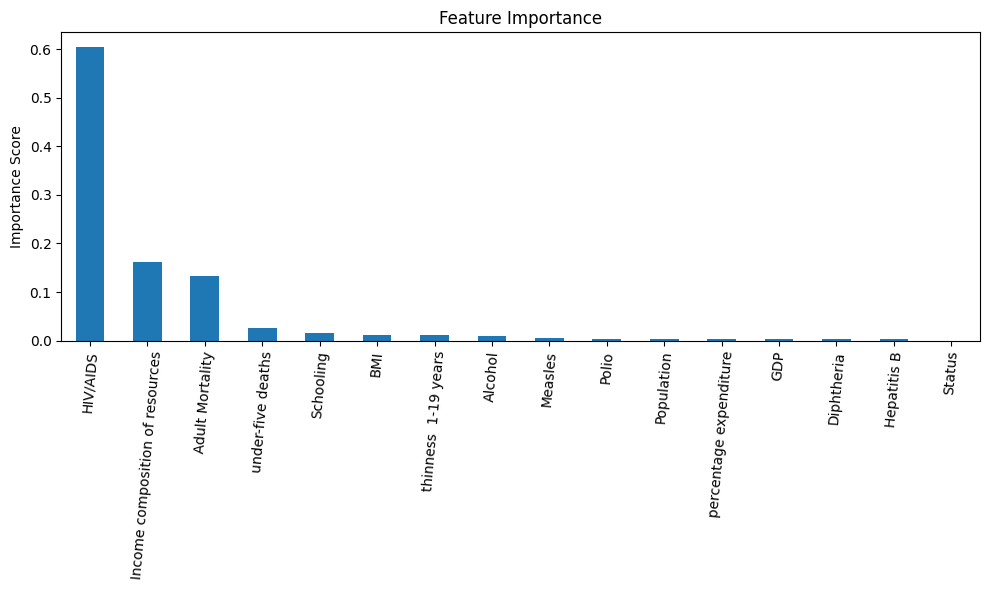

Selected top features based on importance > 0.01: ['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'under-five deaths', 'Schooling', 'BMI', 'thinness  1-19 years']


In [ ]:
# Step 1: Fit the Random Forest model on the training data
model = RandomForestRegressor(random_state=42)
model.fit(X_train_transformed_df, y_train_imputed)

# Step 2: Get the feature importances
importance = pd.Series(model.feature_importances_, index=X_train_transformed_df.columns)

# Step 3: Sort the importances in descending order
importance.sort_values(ascending=False, inplace=True)

# Step 4: Print the sorted feature importances (with the scores)
print("Sorted Feature Importances:")
for feature, score in zip(importance.index, importance):
    print(f"Feature: {feature}, Importance Score: {score:.4f}")

# Step 5: Plot the feature importances with rotated x-axis labels
plt.figure(figsize=(10, 6))
importance.plot(kind='bar', title='Feature Importance')
plt.ylabel("Importance Score")
plt.xticks(rotation=85)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()


# Step 6: Select top features based on importance (those with importance > 0.01)
top_features = importance[importance > 0.01].index.tolist()

# Print the top features
print("Selected top features based on importance > 0.01:", top_features)


In [ ]:
#Select the features whose importance is above 0.01
display(top_features)

['HIV/AIDS',
 'Income composition of resources',
 'Adult Mortality',
 'under-five deaths',
 'Schooling',
 'BMI',
 'thinness  1-19 years']

**Interpretation**

HIV/AIDS is the most important feature for predicting life expectancy, followed by income composition of resources and adult mortality.  Other factors like schooling, BMI, and thinness have a smaller but still measurable impact.  Features like alcohol, measles, polio, and GDP have very low importance.


In [ ]:
# Filter the datasets to include only the top features
X_train_filtered = X_train_transformed_df[top_features]
X_val_filtered = X_val_transformed_df[top_features]
X_test_filtered = X_test_transformed_df[top_features]

# **Evaluate Algorithms**

In [ ]:
# Assuming the transformed data is already loaded:
# X_train_transformed_df, X_val_transformed_df, X_test_transformed_df, y_train_imputed, y_val_imputed

# Select only the top features
top_features = [
    'HIV/AIDS',
    'Income composition of resources',
    'Adult Mortality',
    'under-five deaths',
    'Schooling',
    'BMI',
    'thinness  1-19 years'
]

# Filter the datasets to include only the top features
X_train_filtered = X_train_transformed_df[top_features]
X_val_filtered = X_val_transformed_df[top_features]
X_test_filtered = X_test_transformed_df[top_features]

# Define models
models = {
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42),
    'SVR': SVR(C=10, epsilon=0.1),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01)
}

# Define evaluation function
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error').mean())
    return mae, rmse, cv_rmse, r2

# Evaluate models
results = []
for name, model in models.items():
    mae, rmse, cv_rmse, r2 = evaluate_model(model, X_train_filtered, y_train_imputed, X_val_filtered, y_val_imputed)
    results.append((name, mae, rmse, cv_rmse, r2))

# Convert results to DataFrame and display
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'CV-RMSE', 'R²'])
results_df.sort_values(by='R²', ascending=False, inplace=True)

# Print results
print("Model Comparison Results:")
print(results_df.to_string(index=False))


Model Comparison Results:
                    Model      MAE     RMSE  CV-RMSE       R²
    RandomForestRegressor 1.402839 2.042853 2.337919 0.953207
GradientBoostingRegressor 1.730153 2.394121 2.473624 0.935732
                      SVR 1.684253 2.665813 2.838301 0.920317
    DecisionTreeRegressor 1.792017 2.724118 2.852724 0.916794
                    Lasso 3.161351 4.318852 4.581160 0.790858
                    Ridge 3.162338 4.319871 4.581298 0.790759
         LinearRegression 3.162364 4.320010 4.581385 0.790745


**Interpretation**

* **RandomForestRegressor:**  Highest R² (0.953), lowest MAE and RMSE.  This suggests it provides the best overall fit to the data and predicts life expectancy with relatively low errors.
* **GradientBoostingRegressor:**  Good performance but slightly inferior to the RandomForestRegressor.
* **SVR and DecisionTreeRegressor:** Lower R² values and higher error metrics compared to the top two models.
* **Lasso, Ridge, LinearRegression:** These models have much lower R² and significantly higher error metrics, suggesting that they are not as effective as the tree-based models for this specific dataset.


In [ ]:
warnings.filterwarnings("ignore")


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Fit the grid search to the filtered training data
grid_search.fit(X_train_filtered, y_train_imputed)

# Get the best parameters and reinitialize the model explicitly
best_params = grid_search.best_params_
print("\nBest Parameters for RandomForestRegressor:", best_params)

# Create a final model using the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Fit the final model to the filtered training data
best_rf_model.fit(X_train_filtered, y_train_imputed)

# Optional: Print confirmation
print("\nFinal RandomForestRegressor model created with best parameters.")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Parameters for RandomForestRegressor: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Final RandomForestRegressor model created with best parameters.


In [ ]:
# Predictions on Validation Dataset using top features and using the Final optimized RandomForestRegressor model
y_val_pred = best_rf_model.predict(X_val_filtered)

# Evaluate the final optimized RandomForestRegressor model on the filtered validation set
mae = mean_absolute_error(y_val_imputed, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_imputed, y_val_pred))
r2 = r2_score(y_val_imputed, y_val_pred)

print(f"Final optimized RandomForestRegressor model on Validation Set: MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Final optimized RandomForestRegressor model on Validation Set: MAE: 1.1828, RMSE: 1.8332, R²: 0.9623


**Interpretation**

The analysis indicates that the optimized RandomForestRegressor performs very well in predicting life expectancy, capturing the relationships between several key factors (particularly HIV/AIDS, Income Composition of resources, and Adult Mortality).  The high R² on the validation set suggests that the model is likely to generalize well to unseen data.


#**Ensembles**

In [ ]:
# Define models that showed higher performance
base_models = [
    ('rf', RandomForestRegressor(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200)),
    ('gbr', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=7, random_state=42)),
    ('svr', SVR(C=1.0, epsilon=0.1, kernel='rbf'))
]

# Voting and Stacking models
voting_model = VotingRegressor(estimators=base_models, weights=[3, 2, 1])
stacking_model = StackingRegressor(estimators=base_models, final_estimator=Ridge())

# Train models on filtered training data
voting_model.fit(X_train_filtered, y_train_imputed)
stacking_model.fit(X_train_filtered, y_train_imputed)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=30,
                                                     n_estimators=200)),
                              ('gbr',
                               GradientBoostingRegressor(learning_rate=0.05,
                                                         max_depth=7,
                                                         n_estimators=300,
                                                         random_state=42)),
                              ('svr', SVR())],
                  final_estimator=Ridge())

#**Finalize Model and Predictions on validation dataset**


In [ ]:
# Evaluation function
def evaluate_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean())
    return mae, rmse, r2, cv_rmse

# Evaluate models on filtered(with the top features only) datasets
voting_results = evaluate_model(voting_model, X_train_filtered, y_train_imputed, X_val_filtered, y_val_imputed)
stacking_results = evaluate_model(stacking_model, X_train_filtered, y_train_imputed, X_val_filtered, y_val_imputed)

# Print results
print(f"Voting Regressor MAE: {voting_results[0]:.4f}, RMSE: {voting_results[1]:.4f}, CV-RMSE: {voting_results[3]:.4f}, R²: {voting_results[2]:.4f}")
print(f"Stacking Regressor MAE: {stacking_results[0]:.4f}, RMSE: {stacking_results[1]:.4f}, CV-RMSE: {stacking_results[3]:.4f}, R²: {stacking_results[2]:.4f}")

Voting Regressor MAE: 1.2274, RMSE: 1.9009, CV-RMSE: 2.2051, R²: 0.9595
Stacking Regressor MAE: 1.1041, RMSE: 1.7749, CV-RMSE: 2.1406, R²: 0.9647


**Interpretation**

The provided metrics show the performance of two ensemble regression models, Voting Regressor and Stacking Regressor, on a validation set.  Both models achieve very high R² scores (above 0.96), indicating a strong fit to the data.  The Stacking Regressor slightly outperforms the Voting Regressor across all metrics (MAE, RMSE, CV-RMSE, and R²), suggesting it makes slightly more accurate predictions.  The CV-RMSE (Cross-Validation RMSE) provides an estimate of how well the models are likely to generalize to unseen data.  The relatively small difference between RMSE and CV-RMSE suggests that neither model suffers from substantial overfitting.


##**Therefore, we selected Stacking Regressor as our model because it outperformed Voting Regressor and the optimized Final RandomForestRegressor model.**

###**Prediction on the test dataset**

In [ ]:
# Make predictions on the test set
y_pred = stacking_model.predict(X_test_filtered)

# Evaluate the model
mae = mean_absolute_error(y_test_imputed, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_imputed, y_pred))
r2 = r2_score(y_test_imputed, y_pred)

# Print the evaluation metrics
print(f"Stacking Regressor on Test Set: MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

Stacking Regressor on Test Set: MAE: 1.1309, RMSE: 1.7849, R²: 0.9632


**Interpretation**

we tested the chosen model, Stacking Regressor, in the test dataset and it achieved a Mean Absolute Error (MAE) of 1.1309, Root Mean Squared Error (RMSE) of 1.7849, and an R-squared (R²) score of 0.9632.


In [ ]:
# Save the stacking model
joblib.dump(stacking_model, 'stacking_model.pkl')
print("Stacking model saved as 'stacking_model.pkl'")


Stacking model saved as 'stacking_model.pkl'


In [ ]:
# Download the saved model file
files.download('stacking_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>